<a href="https://colab.research.google.com/github/Gcorrea05/aula-java/blob/main/GS_IA_2SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Previsão de Atrito de Colaboradores com IA

Este projeto tem como objetivo investigar quais fatores organizacionais, demográficos e de trabalho influenciam o bem-estar dos colaboradores e, a partir disso, prever se um colaborador está em risco de atritar (sair da empresa).

Para isso, utilizamos o dataset **IBM HR Analytics Employee Attrition & Performance**, disponível publicamente no Kaggle. Esse conjunto de dados contém informações de cerca de 1.470 colaboradores e aproximadamente 35 variáveis, incluindo:

- Características demográficas (por exemplo, idade, estado civil, gênero)
- Informações de cargo e carreira (job role, job level, anos na empresa)
- Indicadores de bem-estar e satisfação (job satisfaction, environment satisfaction, work-life balance)
- Dados de remuneração e rotina (monthly income, overtime, distance from home)

A partir desses dados, o projeto segue o seguinte fluxo:

1. **Análise Exploratória de Dados (EDA)** para entender padrões de bem-estar e atrito.
2. **Pré-processamento** (tratamento de variáveis categóricas, codificação e preparação para modelagem).
3. **Modelagem de Machine Learning** para prever o risco de atrito (classificação).
4. **Avaliação dos Modelos** com métricas adequadas (AUC, acurácia, recall, F1-score).
5. **Interpretação dos Resultados e Importância das Variáveis**, conectando os achados a recomendações práticas para a área de RH.

**Fonte dos dados (Kaggle)**  
IBM HR Analytics Employee Attrition & Performance:  
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# IMPORT DA BASE DE DADOS E UTILITARIOS


In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais opcionais
plt.style.use("default")
sns.set_palette("Set2")
pd.set_option("display.max_columns", None)

# Caminho do arquivo CSV
csv_path = "/content/WA_Fn-UseC_-HR-Employee-Attrition.csv"

# Carregando o dataset
df = pd.read_csv(csv_path)

# Visão geral inicial
print("Formato do dataset (linhas, colunas):", df.shape)
df.head()

Formato do dataset (linhas, colunas): (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# EDA Inicial


Colunas numéricas:
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Colunas categóricas:
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

=== Contagem de Attrition ===
Attrition
No     1233
Yes     237
Name: count, dtype: int64

=== Percentuais de Attrition ===
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


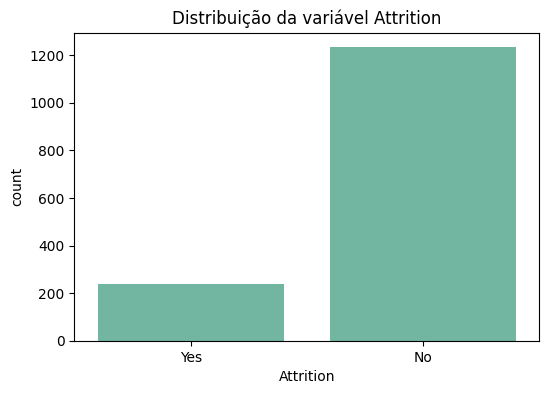

In [8]:
# 1. Separar colunas numéricas e categóricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

#colunas numericas do Dataset
print("\nColunas numéricas:")
print(list(num_cols))

#colunas categoricas do Dataset
print("\nColunas categóricas:")
print(list(cat_cols))

# 2. Análise da variável-alvo Attrition
print("\n=== Contagem de Attrition ===")
print(df['Attrition'].value_counts())

print("\n=== Percentuais de Attrition ===")
print(df['Attrition'].value_counts(normalize=True))

# 3. Primeiro gráfico
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title("Distribuição da variável Attrition")
plt.show()


# Aprofundando a exploração das variáveis que mais aparecem em estudos sobre atrito:

1.   Satisfação no trabalho (JobSatisfaction, EnvironmentSatisfaction etc.)
2.   Jornada e equilíbrio (OverTime, WorkLifeBalance)
3. Variáveis de carreira (YearsAtCompany, YearsInCurrentRole, YearsWithCurrManager)
4. Renda mensal (MonthlyIncome)
5. Distância de casa (DistanceFromHome)
6. Correlação entre variáveis numéricas






#**OverTime X Attrition**
##Por que analisar?
###Horas extras constantes costumam ser um fator forte de desgaste e saída de colaboradores.

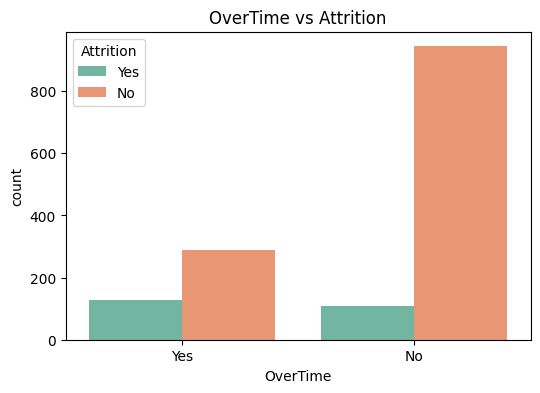

In [59]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("OverTime vs Attrition")
plt.show()


In [47]:
pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100


Attrition,No,Yes
OverTime,,
No,89.563567,10.436433
Yes,69.471154,30.528846


###Com base nos gráficos, podemos analizar que:
###Ao correlacionar funcionarios que fazem horas extras com os atritos("Attrition"), percebe-se que, os funcionarios que fazem hora extra ("OverTime") tendem a deixar a empresa mais do que os que não fazem.

#**MonthlyIncome X Attrition**
##Por que analisar?
###Baixa remuneração é um dos fatores comumente associados ao abandono, especialmente em cargos de nível mais baixo.

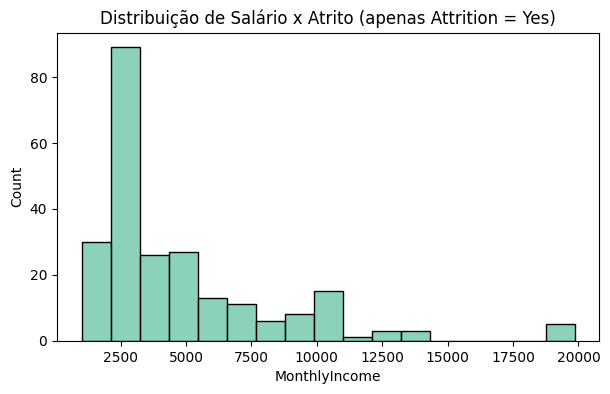

In [65]:
#Gerando novo dataframe (Atrito = Sim)
df_yes = df[df['Attrition'] == 'Yes']

# Gráfico de Salario x Atrito = Sim
plt.figure(figsize=(7,4))
sns.histplot(data=df_yes, x='MonthlyIncome')
plt.title("Distribuição de Salário x Atrito (apenas Attrition = Yes)")
plt.show()

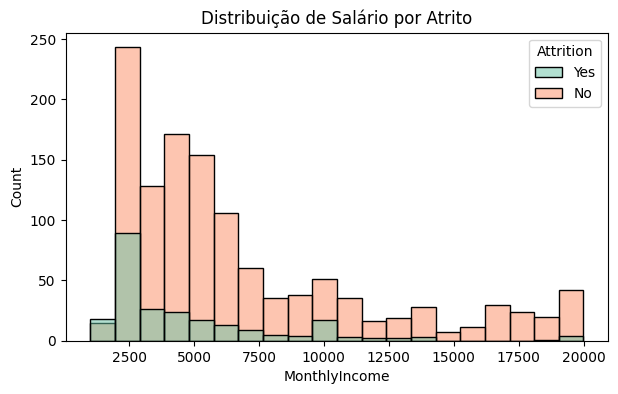

In [68]:
#Gráfico de Salário x Atrito (Histograma)
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition')
plt.title("Distribuição de Salário por Atrito")
plt.show()


In [66]:
# Tabela percentual
pd.crosstab(df['IncomeGroup'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
IncomeGroup,,
0-5k,78.237650,21.762350
5k-10k,88.863636,11.136364
10k-15k,86.486486,13.513514
15k-20k,96.240602,3.759398


###Com base nos gráficos, podemos analizar que:
###Ao correlacionar o salário dos funcionarios("MonthlyIncome") com os atritos("Attrition"), percebe-se que, os funcionarios que recebem menos tendem a deixar a empresa mais do que os que recebem um salário maior.

#**WorkLifeBalance x Attrition**
##Por que analisar?
###Equilíbrio vida-trabalho é crucial para bem-estar e permanência.

In [85]:
# Tabela de percentuais
wlb_attrition_pct = pd.crosstab(
    df['WorkLifeBalance'],
    df['Attrition'],
    normalize='index'
) * 100

wlb_attrition_pct



Attrition,No,Yes
WorkLifeBalance,,
1,68.750000,31.250000
2,83.139535,16.860465
3,85.778275,14.221725
4,82.352941,17.647059


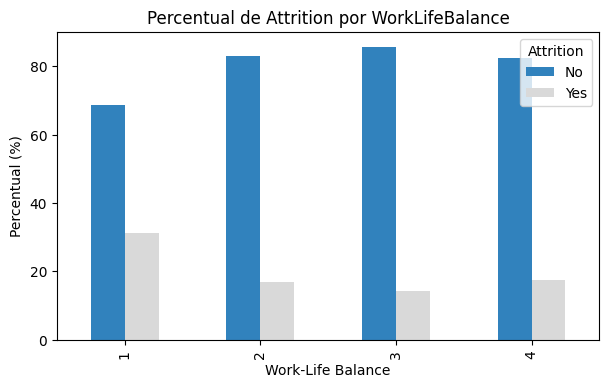

In [92]:
wlb_attrition_pct.plot(
    kind='bar',
    figsize=(7,4),
    colormap='tab20c'
)

plt.title("Percentual de Attrition por WorkLifeBalance")
plt.ylabel("Percentual (%)")
plt.xlabel("Work-Life Balance")
plt.legend(title="Attrition")
plt.show()


###Ao analisar a relação entre o equilíbrio entre vida pessoal e profissional (“WorkLifeBalance”) e o atrito dos colaboradores (“Attrition”), observa-se que as taxas de saída se mantêm relativamente semelhantes entre os diferentes níveis de WLB. Embora exista uma variação pequena entre as categorias, não há um padrão forte indicando que funcionários com pior ou melhor WorkLifeBalance apresentem probabilidade significativamente maior de deixar a empresa.

###Isso sugere que, neste dataset, o nível de WorkLifeBalance não exerce influência direta sobre o atrito dos colaboradores, diferentemente de variáveis como “MonthlyIncome”, que demonstraram associação mais clara com a saída dos funcionários.

#**JobSatisfaction x Attrition**
##Por que analisar?
###Satisfação é um indicador direto de clima organizacional e motivação.



In [100]:
js_attrition_pct = pd.crosstab(
    df['JobSatisfaction'],
    df['Attrition'],
    normalize='index'
) * 100

js_attrition_pct


Attrition,No,Yes
JobSatisfaction,,
1,77.162630,22.837370
2,83.571429,16.428571
3,83.484163,16.515837
4,88.671024,11.328976


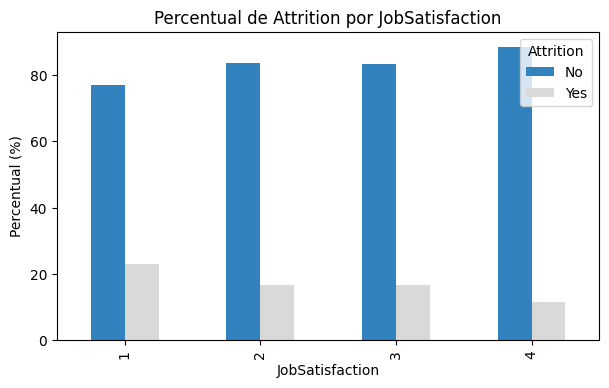

In [102]:
js_attrition_pct.plot(
    kind='bar',
    figsize=(7,4),
    colormap='tab20c'
)

plt.title("Percentual de Attrition por JobSatisfaction")
plt.ylabel("Percentual (%)")
plt.xlabel("JobSatisfaction")
plt.legend(title="Attrition")
plt.show()


### Com base nos gráficos, podemos analisar que:
###Ao correlacionar o nível de satisfação no trabalho dos funcionários (“JobSatisfaction”) com os atritos (“Attrition”), observa-se que as maiores taxas de saída estão concentradas nos colaboradores com níveis mais baixos de satisfação. À medida que o JobSatisfaction aumenta, a proporção de funcionários que deixam a empresa tende a diminuir, indicando que colaboradores mais satisfeitos têm menor probabilidade de atritar em relação aos menos satisfeitos.


#**YearsAtCompany x Attrition**
##Por que analisar?
###Funcionários com pouco tempo de empresa podem ter mais atrito inicial; funcionários muito antigos podem estar estagnados.

In [105]:
bins = [0, 3, 6, 10, 20, df['YearsAtCompany'].max()+1]
labels = ['0-3 anos', '3-6 anos', '6-10 anos', '10-20 anos', '20+ anos']

df['YearsGroup'] = pd.cut(
    df['YearsAtCompany'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
ya_attrition_pct = pd.crosstab(
    df['YearsGroup'],
    df['Attrition'],
    normalize='index'
) * 100

ya_attrition_pct


Attrition,No,Yes
YearsGroup,,
0-3 anos,74.042553,25.957447
3-6 anos,87.172775,12.827225
6-10 anos,87.634409,12.365591
10-20 anos,93.333333,6.666667
20+ anos,87.878788,12.121212


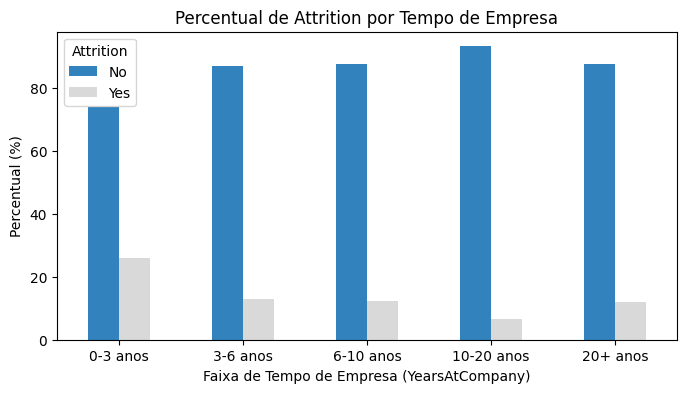

In [107]:
ya_attrition_pct.plot(
    kind='bar',
    figsize=(8,4),
    colormap='tab20c'
)

plt.title("Percentual de Attrition por Tempo de Empresa")
plt.ylabel("Percentual (%)")
plt.xlabel("Faixa de Tempo de Empresa (YearsAtCompany)")
plt.legend(title="Attrition")
plt.xticks(rotation=0)
plt.show()


### Com base no gráfico, podemos analisar que:
###Ao relacionar o tempo de empresa dos funcionários (“YearsAtCompany”) com os atritos (“Attrition”), observa-se que colaboradores que deixam a empresa tendem a ter menos tempo de casa. A mediana de YearsAtCompany é visivelmente menor entre os desligados, indicando que o risco de atrito é maior nos primeiros anos de vínculo. Já os funcionários que permanecem apresentam tempos de empresa mais altos e maior estabilidade, sugerindo que o turnover se concentra principalmente nos colaboradores mais novos na organização.



#**DistanceFromHome x Attrition**
##Por que analisar?
###Quanto maior a distância de deslocamento, maior o desgaste e risco de saída.

In [109]:
bins = [0, 5, 10, 15, 20, df['DistanceFromHome'].max() + 1]
labels = ['0-5 km', '5-10 km', '10-15 km', '15-20 km', '20+ km']

df['DistanceGroup'] = pd.cut(
    df['DistanceFromHome'],
    bins=bins,
    labels=labels,
    include_lowest=True
)
dist_attrition_pct = pd.crosstab(
    df['DistanceGroup'],
    df['Attrition'],
    normalize='index'
) * 100

dist_attrition_pct

Attrition,No,Yes
DistanceGroup,,
0-5 km,86.234177,13.765823
5-10 km,85.532995,14.467005
10-15 km,78.260870,21.739130
15-20 km,81.600000,18.400000
20+ km,77.941176,22.058824


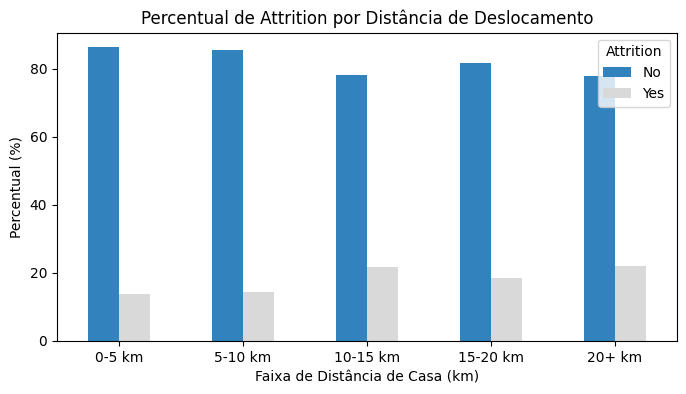

In [111]:
dist_attrition_pct.plot(
    kind='bar',
    figsize=(8,4),
    colormap='tab20c'
)

plt.title("Percentual de Attrition por Distância de Deslocamento")
plt.ylabel("Percentual (%)")
plt.xlabel("Faixa de Distância de Casa (km)")
plt.legend(title="Attrition")
plt.xticks(rotation=0)
plt.show()

###Com base no gráfico, podemos analisar que:

###Ao relacionar a distância entre a residência dos funcionários e o local de trabalho (“DistanceFromHome”) com os atritos (“Attrition”), observa-se que colaboradores que deixam a empresa tendem a morar um pouco mais longe do que aqueles que permanecem. A mediana de DistanceFromHome é levemente maior entre os desligados, sugerindo que deslocamentos mais longos podem aumentar o desgaste diário e contribuir para a decisão de saída. Já os funcionários que permanecem apresentam distâncias ligeiramente menores, indicando que trajetos mais curtos podem favorecer a permanência e reduzir o risco de atrito.

#**Análise por Cargo (JobRole)**
##Por que analisar?
###Alguns cargos têm taxas de atrito mais altas pela natureza das funções.

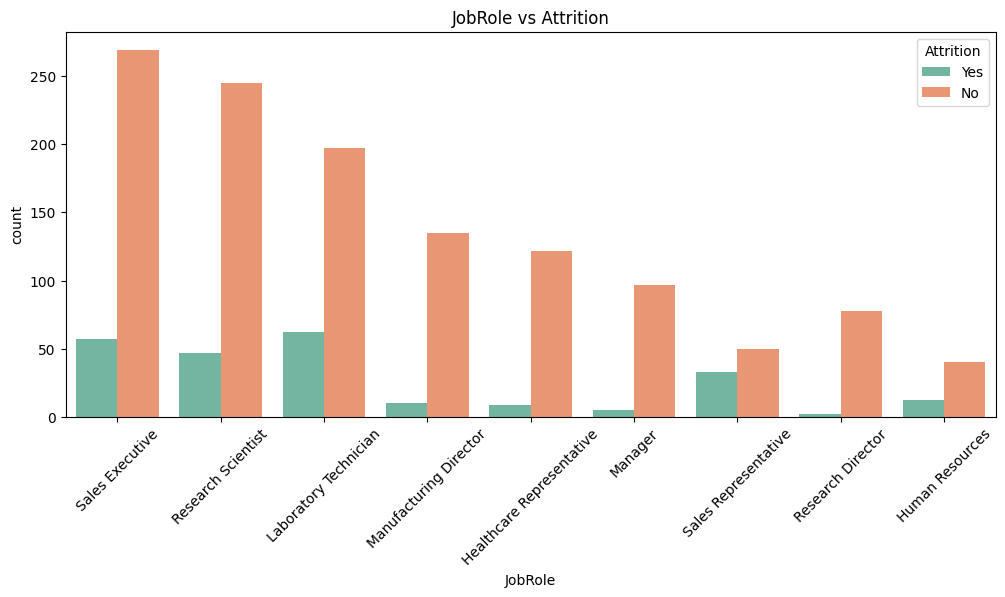

In [116]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='JobRole', hue='Attrition')
plt.xticks(rotation=45)
plt.title("JobRole vs Attrition")
plt.show()


### Com base no gráfico, podemos analisar que:
###Ao comparar os diferentes cargos da empresa (“JobRole”) com os atritos (“Attrition”), observa-se que algumas funções apresentam níveis de saída mais elevados do que outras. Cargos como Sales Executive, Research Scientist e Laboratory Technician concentram o maior número de desligamentos, indicando que essas áreas podem estar mais expostas a pressões operacionais, metas agressivas ou rotinas intensas.

###Por outro lado, funções de maior senioridade, como Manager, Manufacturing Director e Research Director, possuem baixíssimas taxas de atrito, sugerindo maior estabilidade, experiência e vínculo organizacional. De forma geral, percebe-se que cargos mais técnicos ou comerciais apresentam maior rotatividade, enquanto posições estratégicas ou de liderança tendem a reter seus colaboradores por mais tempo.


#**Correlação entre variáveis numéricas**
##Por que analisar?
###Ajuda a perceber padrões, redundâncias e relações importantes.

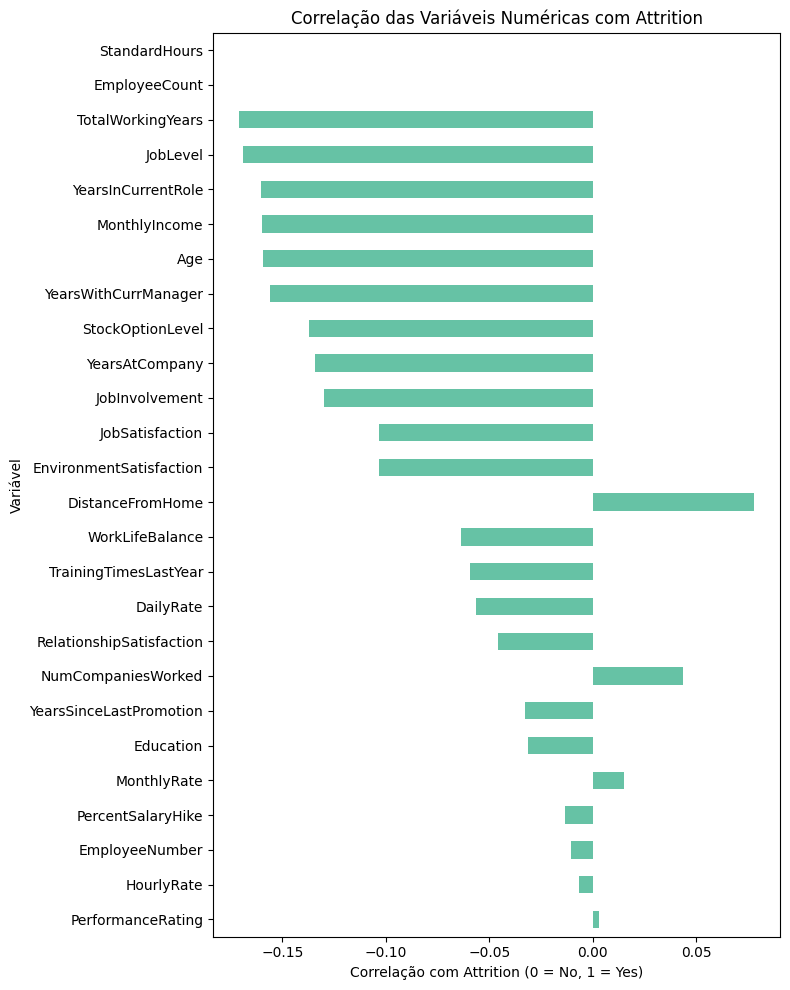

In [115]:
# Criar coluna numérica para Attrition
df['Attrition_num'] = df['Attrition'].map({'No': 0, 'Yes': 1})
# Seleciona apenas numéricas (incluindo Attrition_num)
num_cols_full = df.select_dtypes(include=['int64', 'float64']).columns

corr_full = df[num_cols_full].corr()

# Correlação de cada variável com Attrition_num
corr_attrition = corr_full['Attrition_num'].drop('Attrition_num')

# Ordenar por importância (absoluta)
corr_attrition_sorted = corr_attrition.reindex(
    corr_attrition.abs().sort_values(ascending=True).index
)
plt.figure(figsize=(8, 10))
corr_attrition_sorted.plot(kind='barh')
plt.title("Correlação das Variáveis Numéricas com Attrition")
plt.xlabel("Correlação com Attrition (0 = No, 1 = Yes)")
plt.ylabel("Variável")
plt.tight_layout()
plt.show()


### Com base no gráfico, podemos analisar que:
Ao comparar os diferentes cargos da empresa (“JobRole”) com os atritos (“Attrition”), observa-se que algumas funções apresentam níveis de saída mais elevados do que outras. Cargos como Sales Executive, Research Scientist e Laboratory Technician concentram o maior número de desligamentos, indicando que essas áreas podem estar mais expostas a pressões operacionais, metas agressivas ou rotinas intensas.

Por outro lado, funções de maior senioridade, como Manager, Manufacturing Director e Research Director, possuem baixíssimas taxas de atrito, sugerindo maior estabilidade, experiência e vínculo organizacional. De forma geral, percebe-se que cargos mais técnicos ou comerciais apresentam maior rotatividade, enquanto posições estratégicas ou de liderança tendem a reter seus colaboradores por mais tempo.
